In [ ]:
#题目一、以鸢尾花数据集为例学习 SVM
#1.加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
#2.创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
#3.使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征
y = iris.target  # 标签

# 划分数据集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练SVM模型，使用线性核函数
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 预测测试集
y_pred = svm_model.predict(X_test)

# 计算各个评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 使用'macro'计算每类的召回率
f1 = f1_score(y_test, y_pred, average='macro')  # 使用'macro'计算每类的F1得分
conf_matrix = confusion_matrix(y_test, y_pred)

# 输出评估结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a 
数据样本: From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Orga

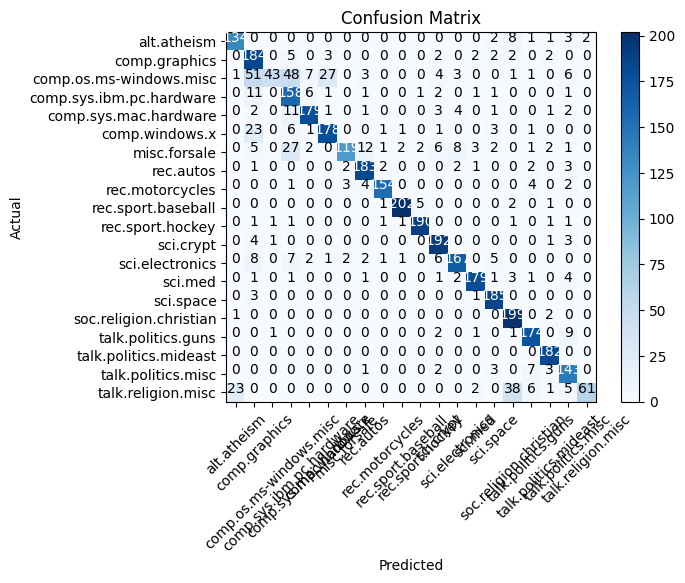

In [12]:
#题目二、以新闻数据分类为例 学习朴素贝叶斯
#1.导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
#2.查看类别标签、数据集的描述、数据样本
#3.将文本数据转换为词袋模型
#4.将数据集分为训练集和测试集，训练集比例0.2，随机种子42
#5.创建并训练朴素贝叶斯分类器
#6.使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
#7.横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


# 1. 导入库与数据集
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# 2. 查看类别标签、数据集的描述、数据样本
print("类别标签:", newsgroups.target_names)
print("数据集描述:", newsgroups.DESCR[:500])#打印前500字符
print("数据样本:", newsgroups.data[0])

# 3. 将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# 4. 将数据集分为训练集和测试集，训练集比例0.2，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 创建并训练朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 6. 使用Accuracy、Recall、F1 Score这三个评估指标来评估实验效果
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# 7. 横坐标为Predicted，纵坐标为Actual，画出混淆矩阵Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(newsgroups.target_names))
plt.xticks(tick_marks, newsgroups.target_names, rotation=45)
plt.yticks(tick_marks, newsgroups.target_names)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


簇中心:
 [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


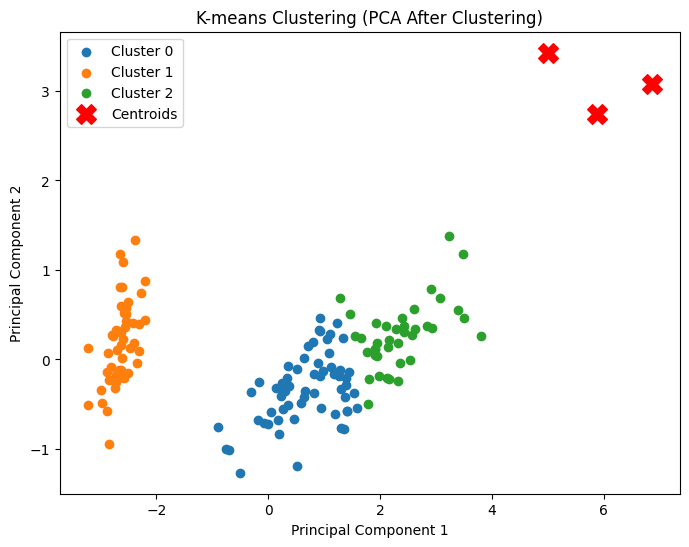

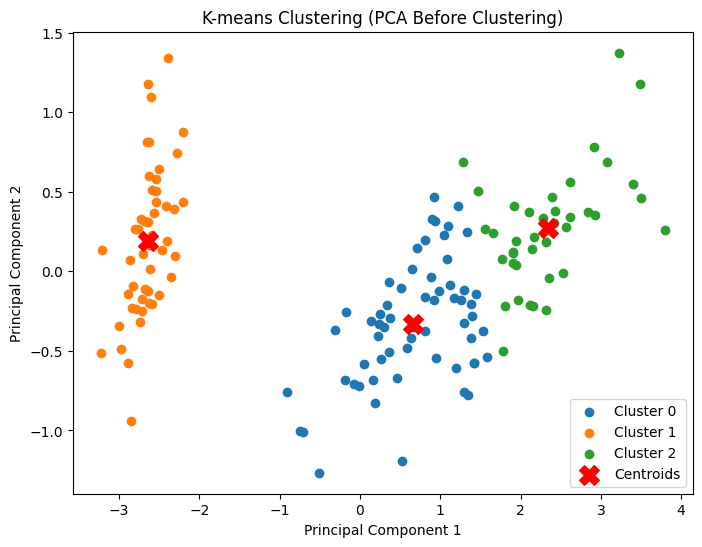

聚类后 PCA 的轮廓系数: 0.5512
先降维再聚类的轮廓系数: 0.5977


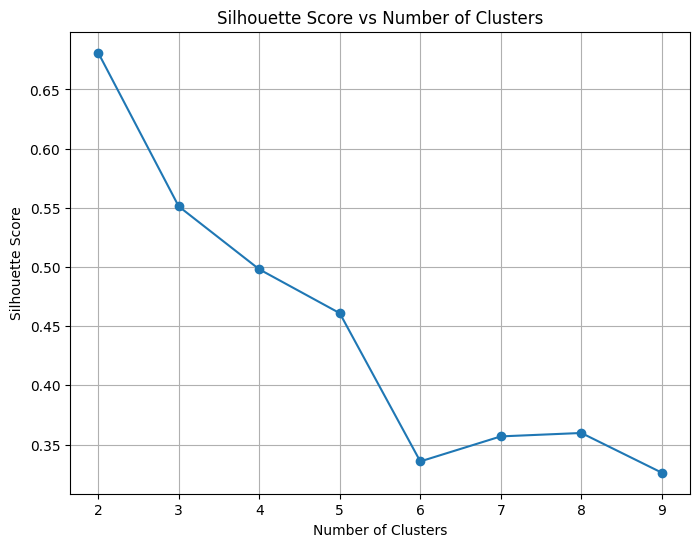

In [7]:
#题目三、以鸢尾花数据集为例 学习k-means聚类
#1.导入数据集和聚类库
#2.使用k-means聚类，将数据分为3个簇，设置随机种子为0
#3.PCA 降维到2维空间后，输出可视化结果
#4.尝试先降维，再聚类，再输出可视化结果，比较两次的不同
#5.使用轮廓系数比较聚类效果
#6.绘制轮廓系数与聚类数的关系图

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征
y = iris.target  # 真实标签（仅用于比较，不参与聚类）

# 使用 K-means 聚类，将数据分为 3 个簇，随机种子为 0
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 打印每个簇的中心点
print("簇中心:\n", kmeans.cluster_centers_)

# PCA 降维到 2D 空间
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
for cluster in np.unique(y_kmeans):
    plt.scatter(X_pca[y_kmeans == cluster, 0], X_pca[y_kmeans == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering (PCA After Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 先降维到 2D 空间
X_pca_before = PCA(n_components=2).fit_transform(X)

# 再进行 K-means 聚类
kmeans_pca = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca_before)

# 可视化结果
plt.figure(figsize=(8, 6))
for cluster in np.unique(y_kmeans_pca):
    plt.scatter(X_pca_before[y_kmeans_pca == cluster, 0], X_pca_before[y_kmeans_pca == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering (PCA Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 计算轮廓系数
silhouette_original = silhouette_score(X, y_kmeans)
silhouette_pca = silhouette_score(X_pca_before, y_kmeans_pca)

print(f"聚类后 PCA 的轮廓系数: {silhouette_original:.4f}")
print(f"先降维再聚类的轮廓系数: {silhouette_pca:.4f}")

# 测试不同的聚类数 k
silhouette_scores = []
k_values = range(2, 10)  # 聚类数从 2 到 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, y_kmeans)
    silhouette_scores.append(silhouette)

# 绘制关系图
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()
